In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()



train_images, test_images = train_images / 255.0, test_images / 255.0




train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Specify input shape only in the first Conv2D layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Save the model (optional)
model.save('simple_cnn_model.h5')

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.3168 - loss: 1.8497 - val_accuracy: 0.5008 - val_loss: 1.3822
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.5276 - loss: 1.3101 - val_accuracy: 0.5730 - val_loss: 1.1824
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.5990 - loss: 1.1349 - val_accuracy: 0.5870 - val_loss: 1.1915
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.6386 - loss: 1.0191 - val_accuracy: 0.6612 - val_loss: 0.9704
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6770 - loss: 0.9230 - val_accuracy: 0.6684 - val_loss: 0.9830
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6523 - loss: 0.9971


Test accuracy: 0.6510


In [9]:
# Function to predict the class of an input image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
def predict_image(image_path):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    print(f"Predicted class: {class_names[predicted_class]}")

    # Display the image
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted class: automobile


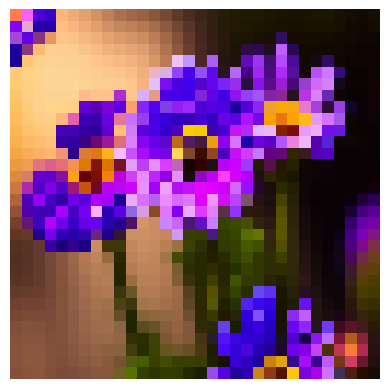

In [11]:
image_path = "/ex-3_cnn.jpg"
predict_image(image_path)